In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Lecture 11

## Exercise 11.1

The first thing we want to do is to build a neural network able to fit some randomly generated data (following $f(x)=2x+1$ with gaussian noise) to a linear function. In order to study how NNs work, we try different combinations of parameters to see what gives the best results. In particular, we try all the combinations between $N_{{epochs}}\in \{10, 30, 50\}$, $N_{{train}}\in \{100, 500\}$ and $\sigma_{noise} \in \{0, 0.5, 1.0\}$.

The optimizing algorithm chosen is SGD and the loss function MSE. In every NN used $N_{train}=10N_{valid}$.

Please note that the comments made in this and the following exercises refer to the results that are shown as of the opening of the notebook. Rerunning the cells will lead to slightly different results, so some considerations made might not be true anymore.

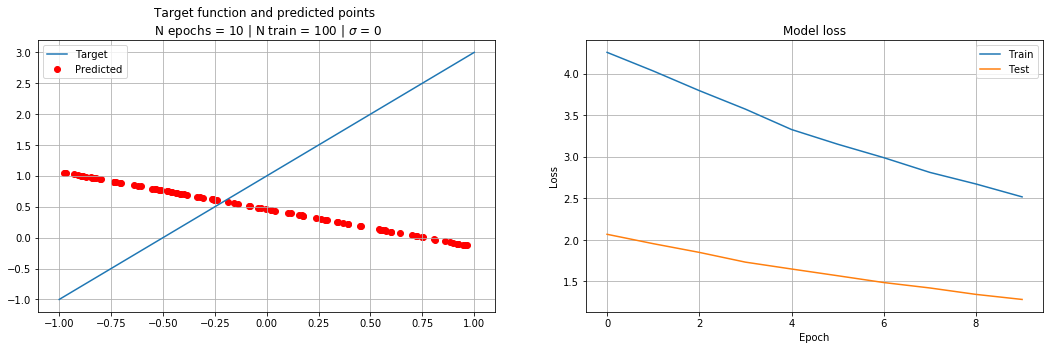

1  of  18  done


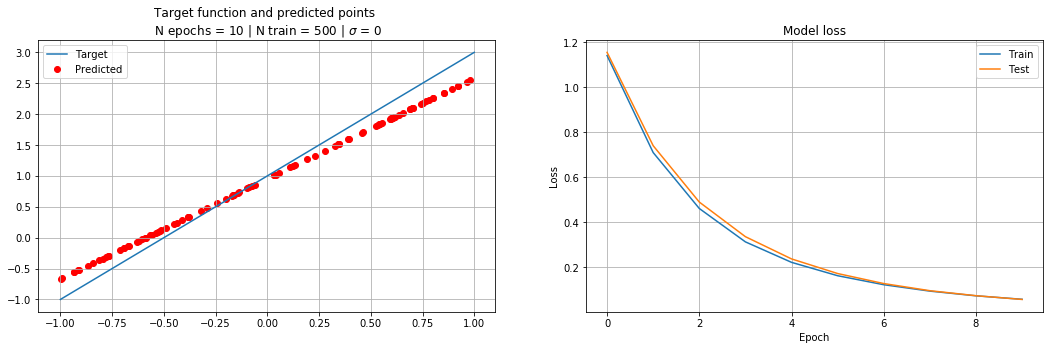

2  of  18  done


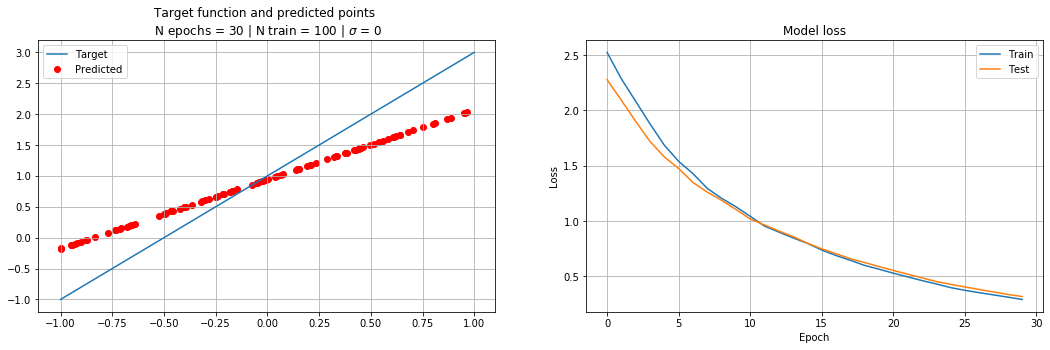

3  of  18  done


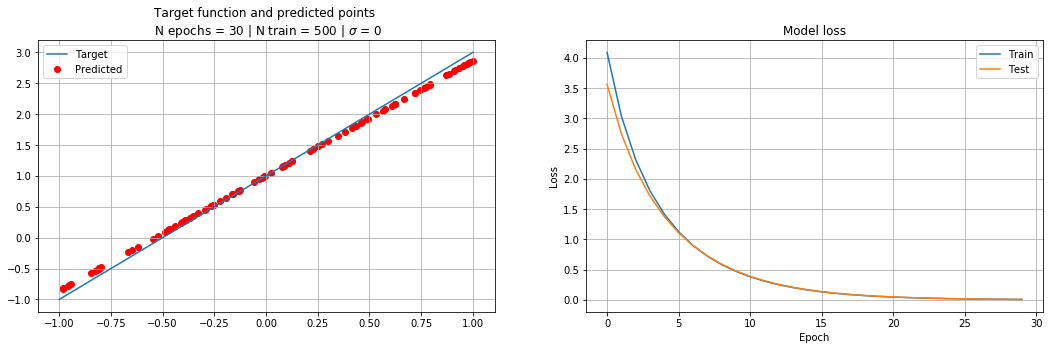

4  of  18  done


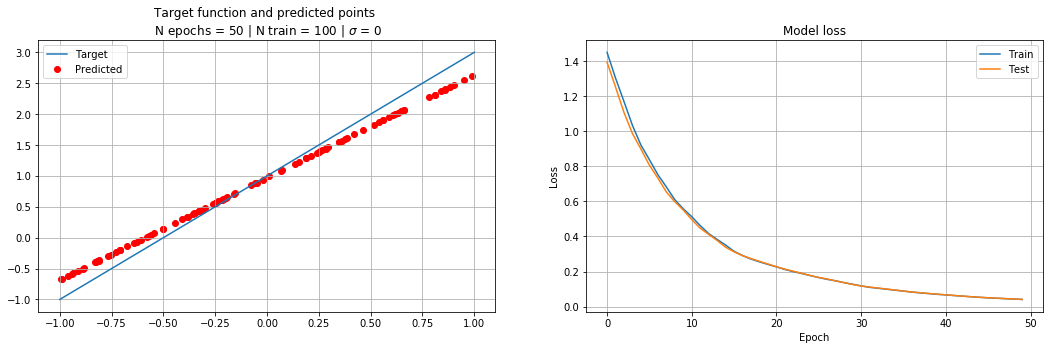

5  of  18  done


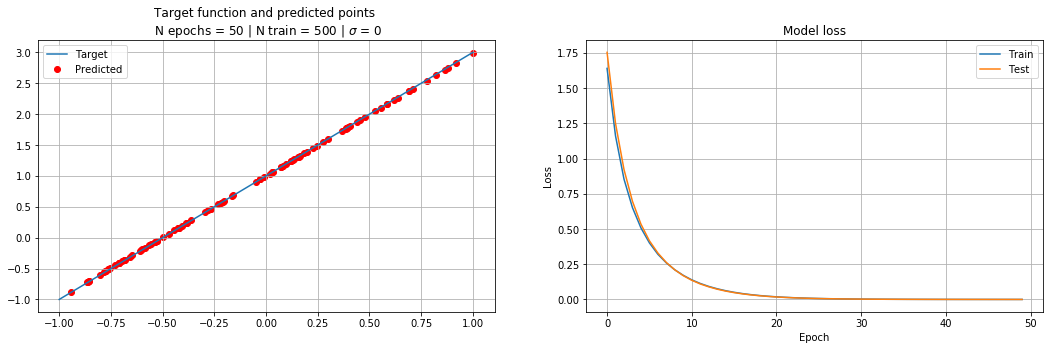

6  of  18  done


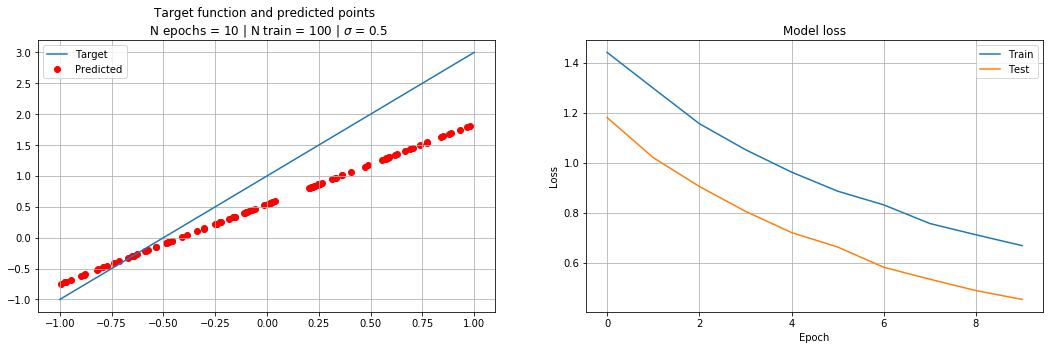

7  of  18  done


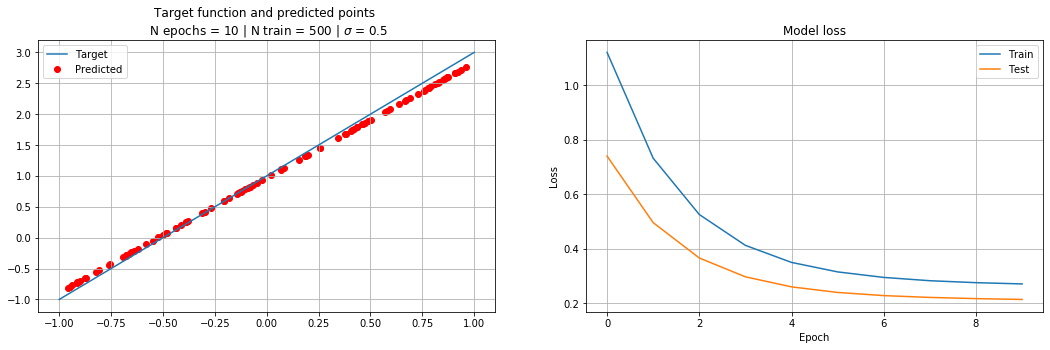

8  of  18  done


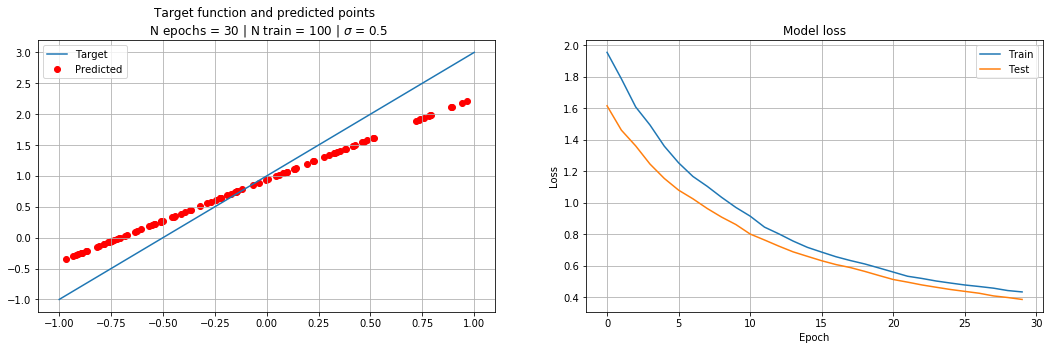

9  of  18  done


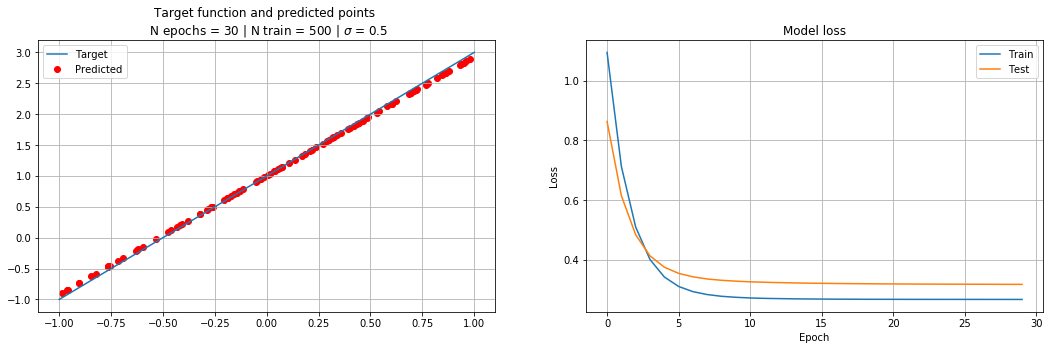

10  of  18  done


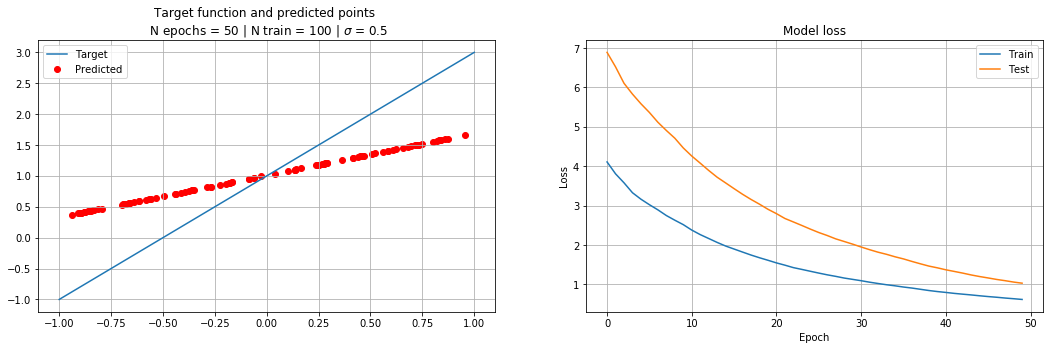

11  of  18  done


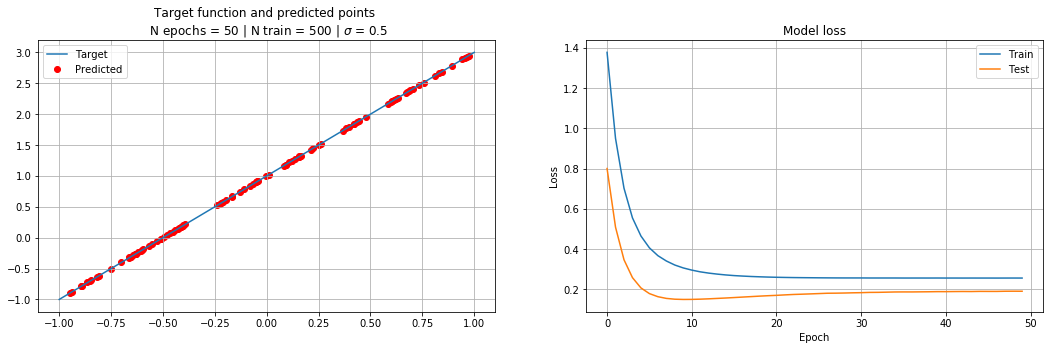

12  of  18  done


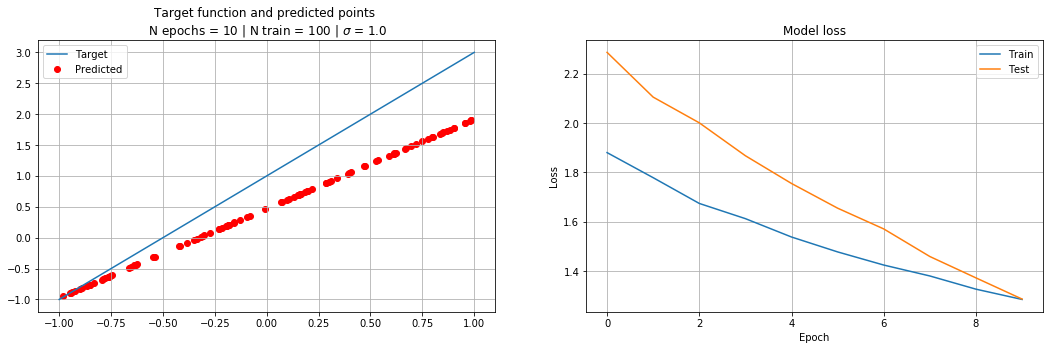

13  of  18  done


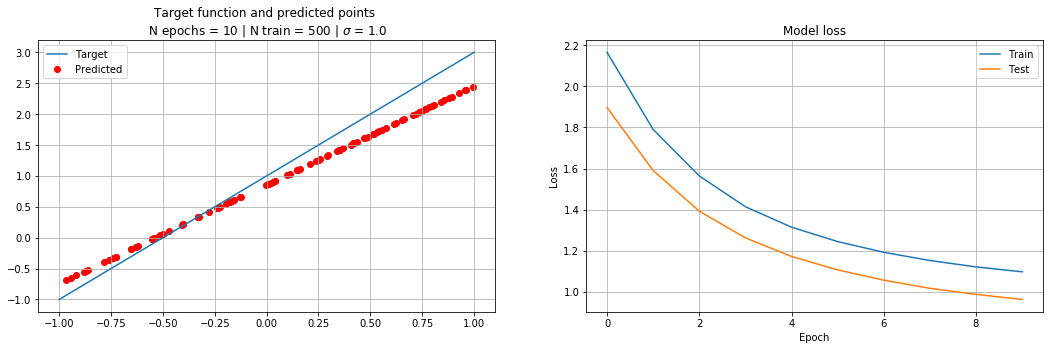

14  of  18  done


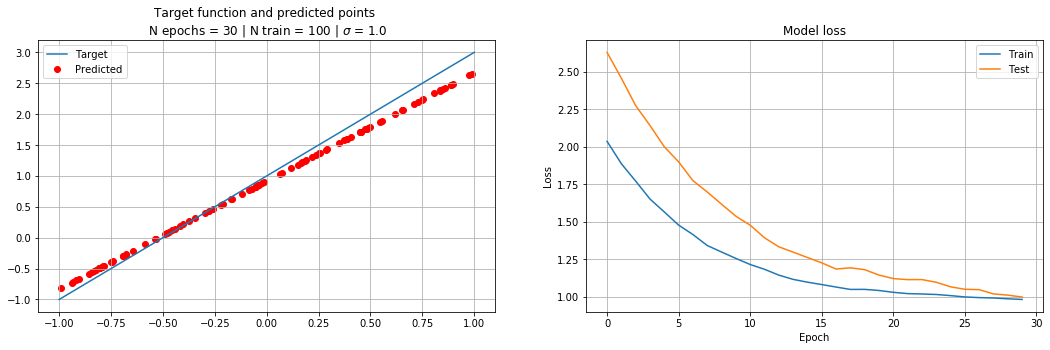

15  of  18  done


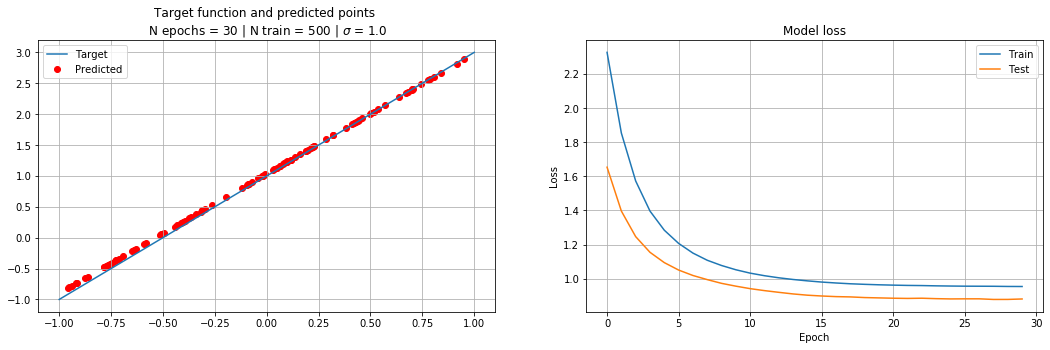

16  of  18  done


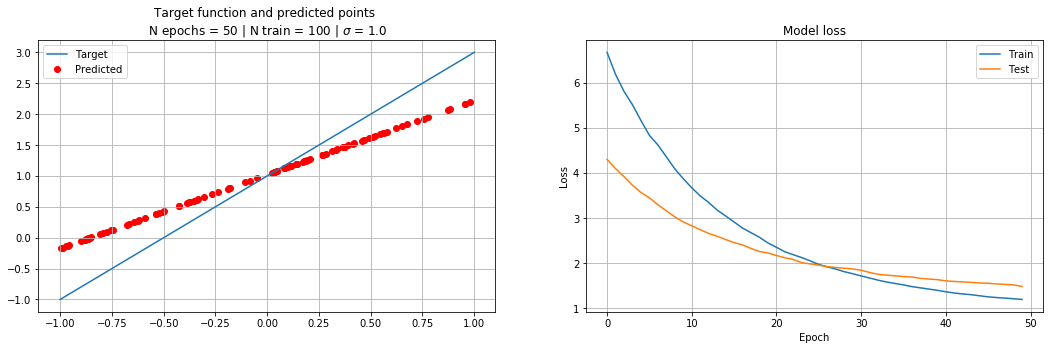

17  of  18  done


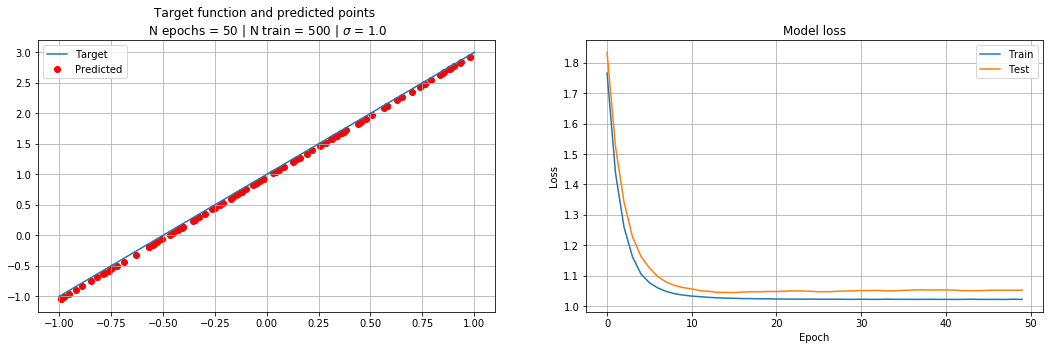

18  of  18  done


In [4]:
#target parameters of f(x) = m*x + b
m=2 #slope
b=1 #intersect
np.random.seed(0)
 
#trying different combinations
Epoch=[10, 30, 50]  #number of epochs
Train=[100, 500]    #number of training points
Sigma=[0, 0.5, 1.]  #noise

i=0

for sigma in Sigma:
    for epoch in Epoch:
        for train in Train:
            
            #generating training points
            x_train = np.random.uniform(-1, 1, train)
            y_train = np.random.normal(m * x_train + b, sigma)
            #generating validation points
            x_valid = np.random.uniform(-1, 1, int(train/10) )
            x_valid.sort()
            y_valid = np.random.normal(m * x_valid + b, sigma)
            
            #composing the NN model
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,)))
            #compiling the NN model
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            #fitting the NN model using training data
            history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=epoch, shuffle=True, validation_data=(x_valid, y_valid), verbose=False)
            
            #preparing predicted points
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model.predict(x_predicted)
            #and the target function
            x_target = np.linspace(-1,1,num=100)
            y_target = m * x_target + b
            
            #plotting results
            plt.figure(i, figsize = (18, 5))
            #predicted points and the target function
            plt.subplot(1, 2, 1)
            plt.scatter(x_predicted, y_predicted, color='r', label="Predicted")
            plt.plot(x_target, y_target, label="Target")
            plt.title(f"Target function and predicted points \n N epochs = {epoch} | N train = {train} | $\sigma$ = {sigma}")
            plt.grid(True)
            plt.legend()
            #loss functions
            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend(['Train', 'Test'], loc='best')
            plt.grid(True)
            plt.show()
            
            i+=1
            print(i, " of ", len(Epoch)*len(Train)*len(Sigma), " done")

As it was expected, the less the noise introduced in the data and the more the epochs and training points used, the better is generally the result. However when the noise is high, using lot of epochs and training points can lead to overfitting (for example in the last NN the value of $b$ was clearly overfitted and is slightly lower than 1. We get a better result with this level of noise using $30$ epochs instead of $50$). Another observation we can make is that it seems like adding more training points is more important than adding epochs.

## Exercise 11.2

This time we try to fit data generated following $f(x)=3x^3-2x^2-3x+4$, $x\in[-1,1]$ with a polynomial. $N_{epochs}$ is fixed at $50$, the noise at $0.5$, $N_{train}=1500$ and $N_{valid}=150$. We once again use 18 different NNs, trying all the possible combinations between $N_{{layers}}\in \{5, 10, 15\}$, $N_{{neurons}}\in \{5, 10, 15\}$ and the activation functions selu and tanh.

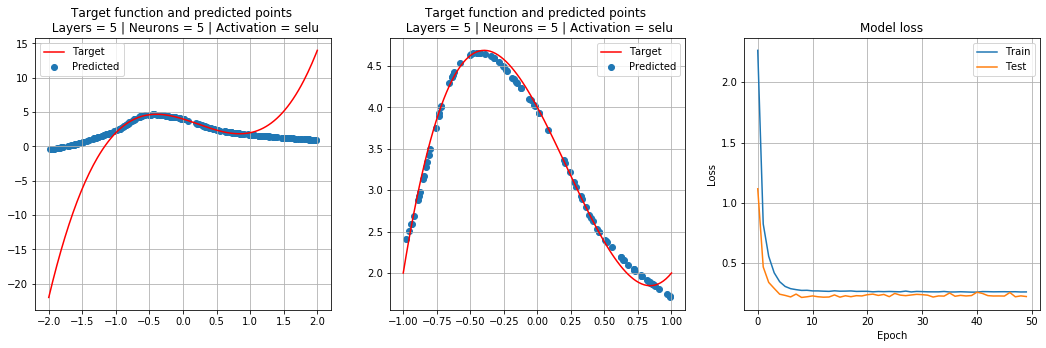

1  of  18  done


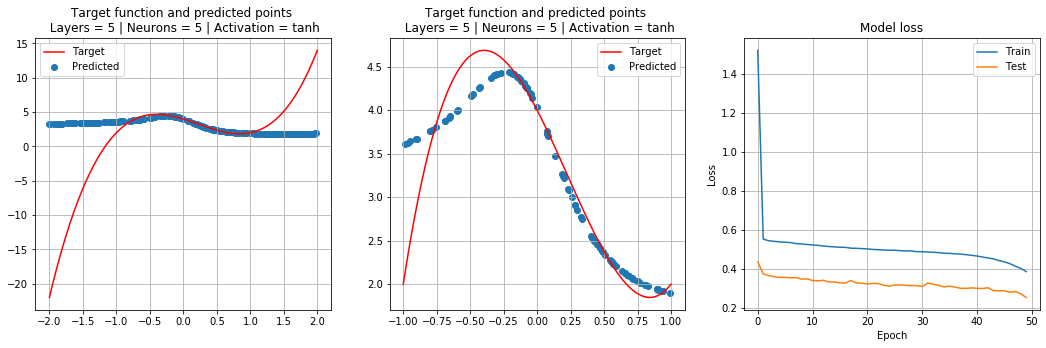

2  of  18  done


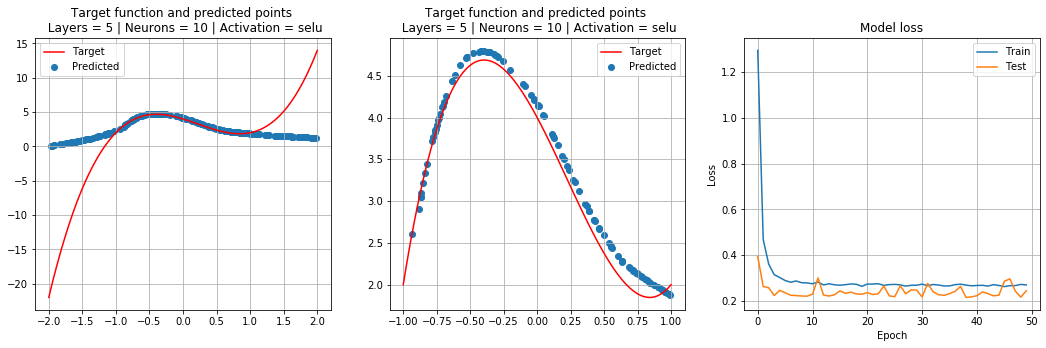

3  of  18  done


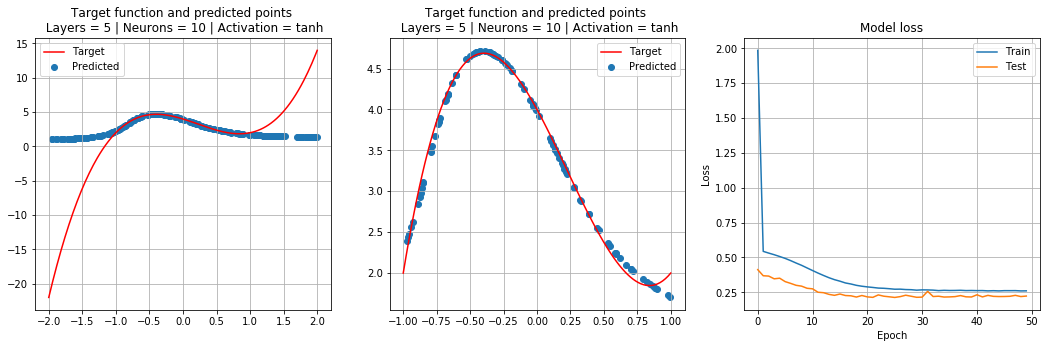

4  of  18  done


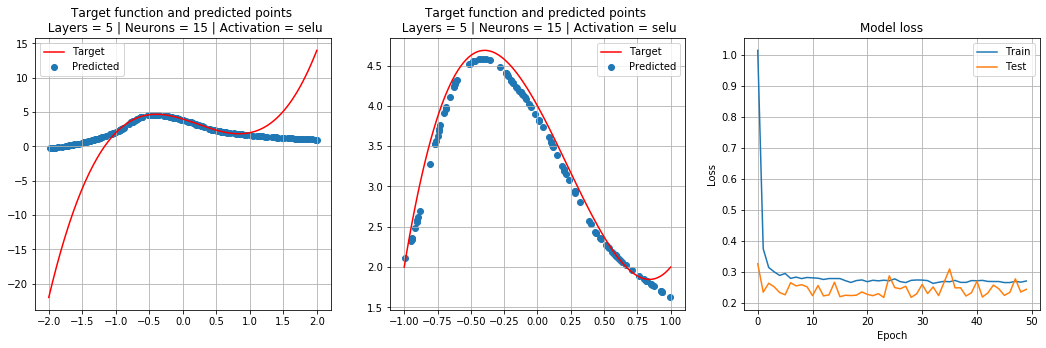

5  of  18  done


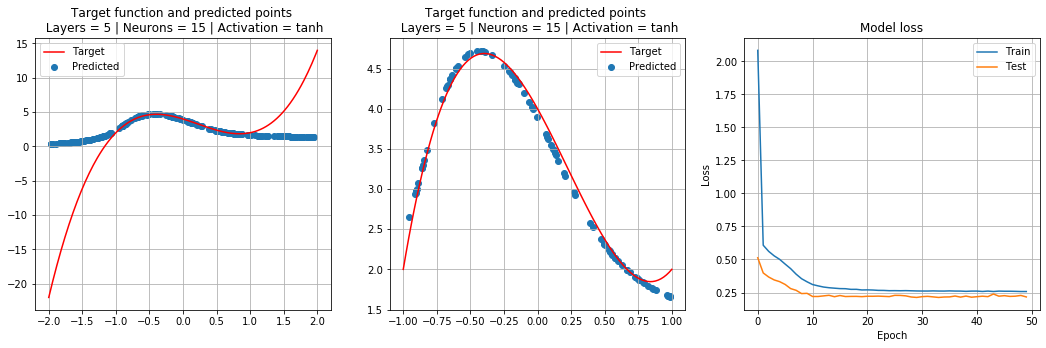

6  of  18  done


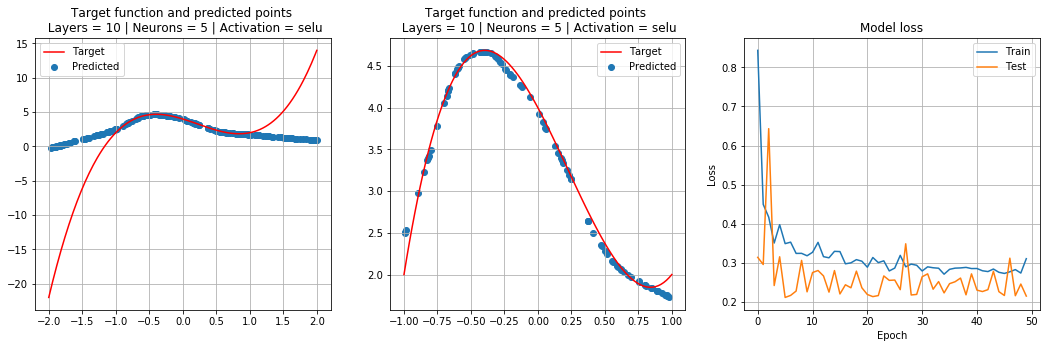

7  of  18  done


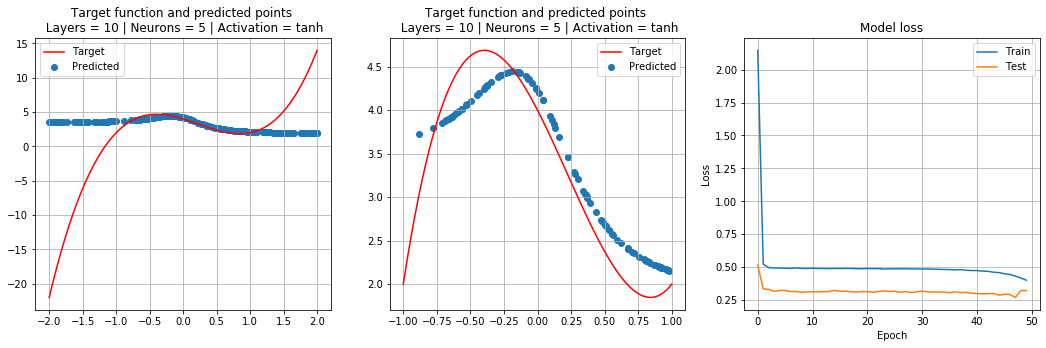

8  of  18  done


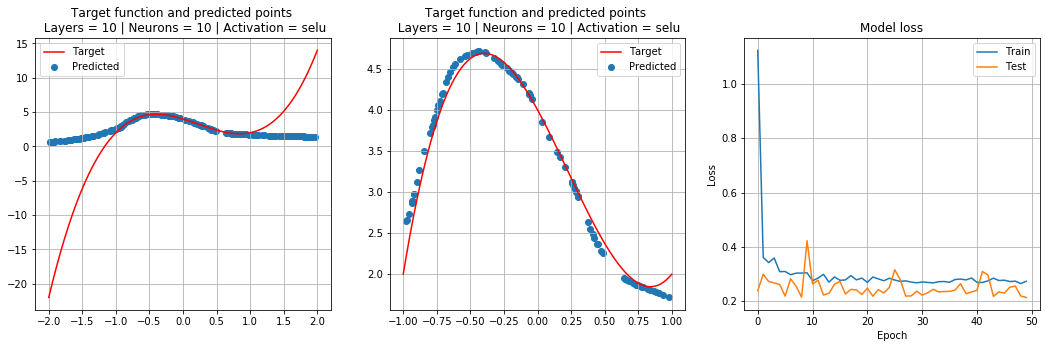

9  of  18  done


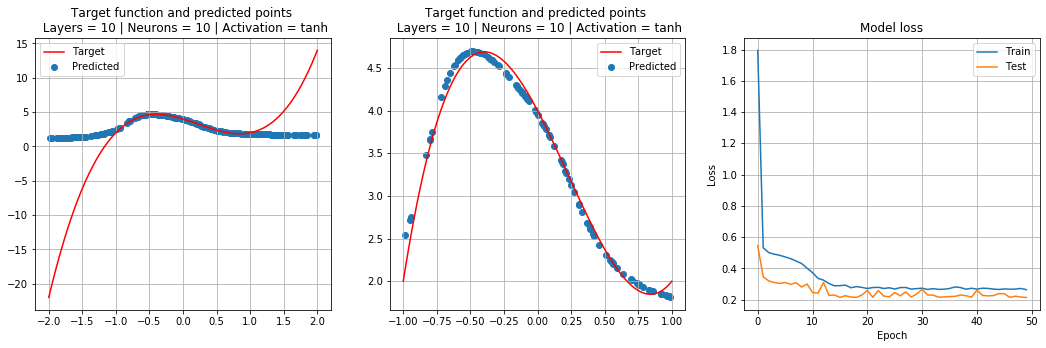

10  of  18  done


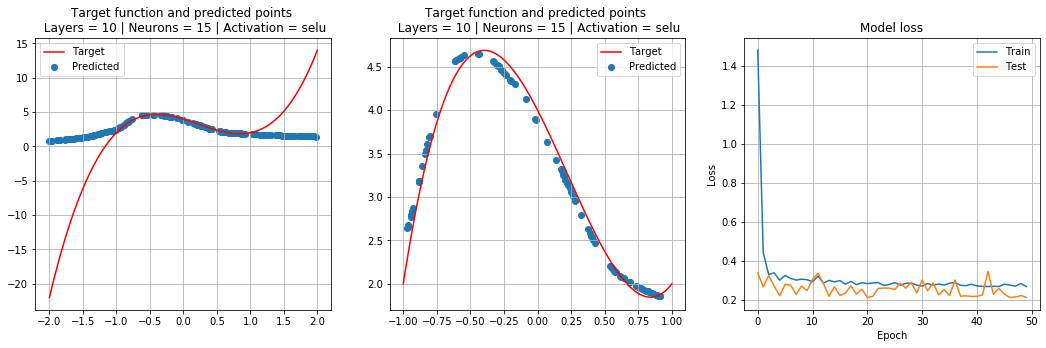

11  of  18  done


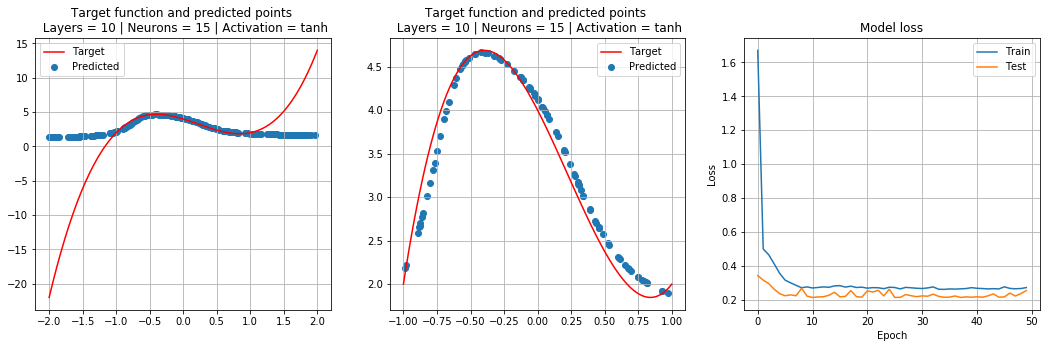

12  of  18  done


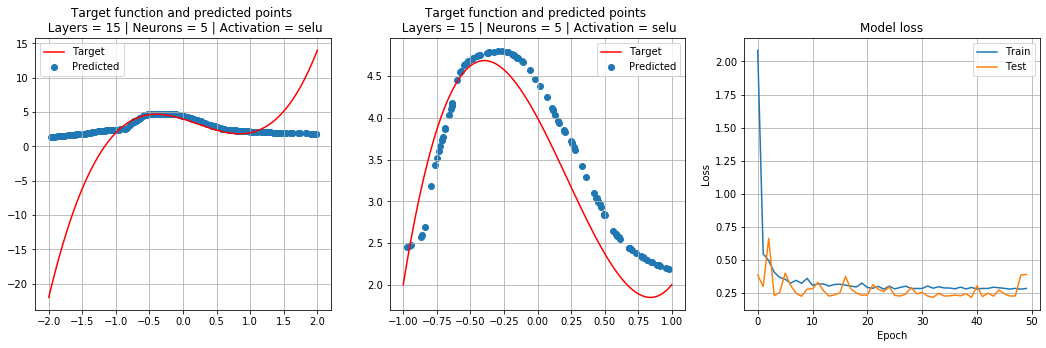

13  of  18  done


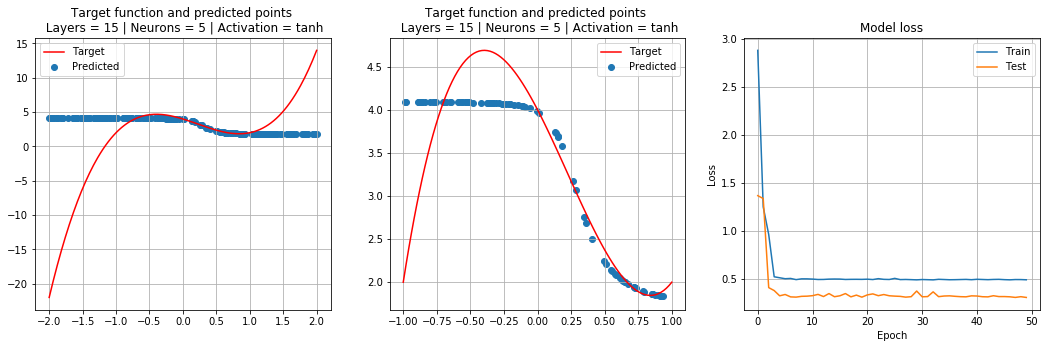

14  of  18  done


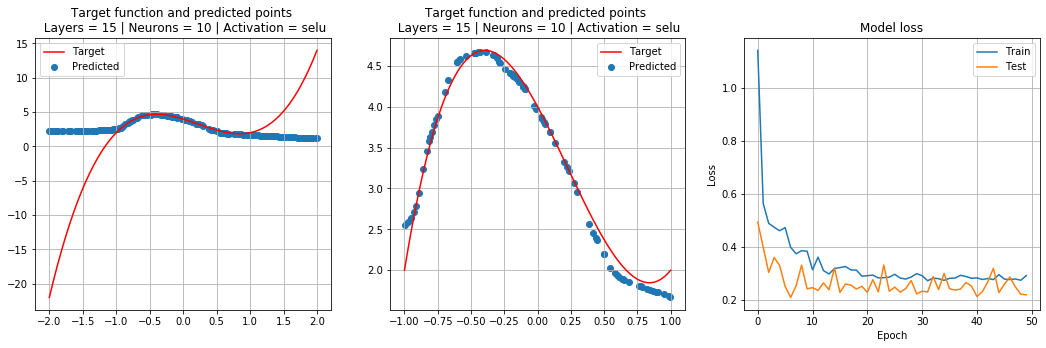

15  of  18  done


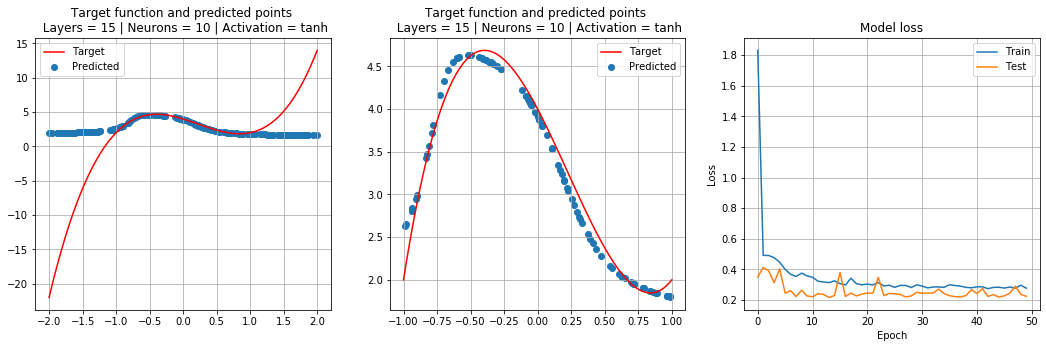

16  of  18  done


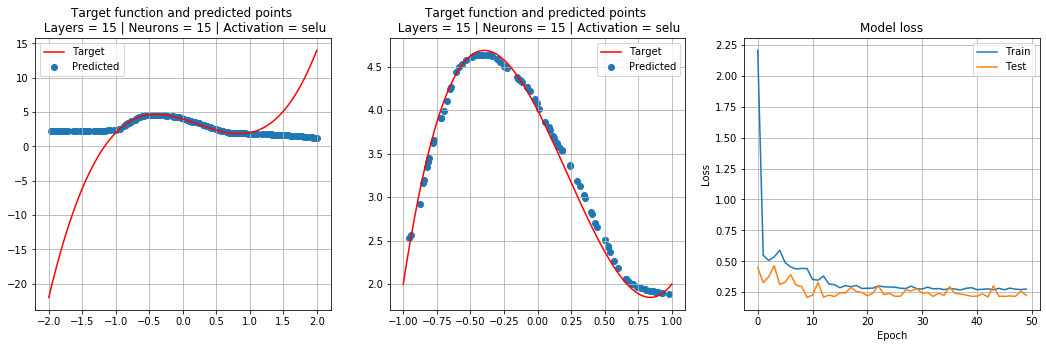

17  of  18  done


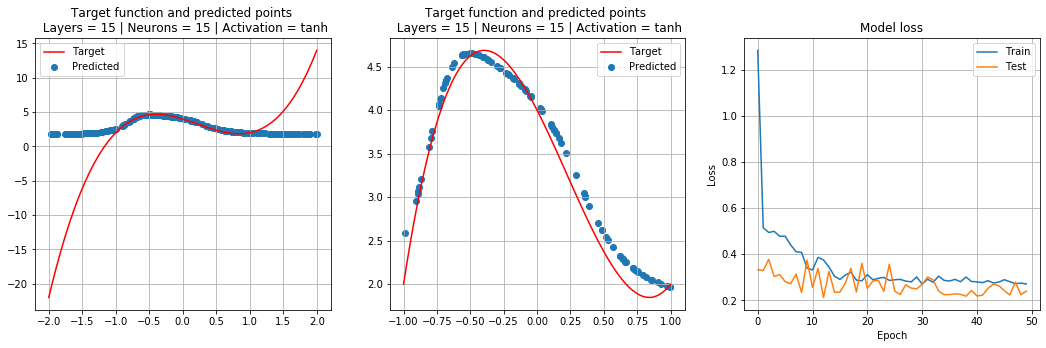

18  of  18  done


In [11]:
#trying different combinations
Layer=[5, 10, 15]       #number of layers
Neuron=[5, 10, 15]      #number of neurons per layer
Active=["selu", "tanh"]  #activation function

epoch=50
sigma=0.5

#generating training points
x_train = np.random.uniform(-1, 1, 1500)
y_train = np.random.normal( 3*x_train**3-2*x_train**2-3*x_train+4, sigma)
#generating validation points
x_valid = np.random.uniform(-1, 1, 150 )
x_valid.sort()
y_valid = np.random.normal( 3*x_valid**3-2*x_valid**2-3*x_valid+4, sigma)

i=0

for layer in Layer:
    for neuron in Neuron:
        for active in Active:
            
            #composing the NN model
            model=tf.keras.Sequential()
            model.add(Dense(neuron, input_shape=(1,), activation=active))
            #adding layers
            for k in range(layer-2):
                model.add(Dense(neuron, activation=active))
            model.add(Dense(1))
            #compiling the NN model
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            #fitting the NN model using training data
            history=model.fit(x=x_train, y=y_train, batch_size=32, epochs=epoch, shuffle=True, validation_data=(x_valid, y_valid), verbose=False)
            
            #preparing predicted points
            x_predicted = np.random.uniform(-2, 2, 200)
            y_predicted = model.predict(x_predicted)
            #and the target function
            x_target = np.linspace(-2,2,num=200)
            y_target = 3*x_target**3-2*x_target**2-3*x_target+4
            #repeating for the "zoomed in" plot
            x_predicted_short = []
            y_predicted_short = []
            for c in range (0,200) :
                if x_predicted[c]>-1 and x_predicted[c]<1 :
                    x_predicted_short.append(x_predicted[c])
                    y_predicted_short.append(y_predicted[c])
            x_target_short = np.linspace(-1,1,num=100)
            y_target_short = 3*x_target_short**3-2*x_target_short**2-3*x_target_short+4
            
            #plotting results
            plt.figure(i, figsize = (18, 5))
            #predicted points and the target function
            plt.subplot(1, 3, 1)
            plt.scatter(x_predicted, y_predicted, label="Predicted")
            plt.plot(x_target, y_target, color="red", label="Target")
            plt.title(f"Target function and predicted points \n Layers = {layer} | Neurons = {neuron} | Activation = {active}")
            plt.grid(True)
            plt.legend()
            #predicted points and the target function, "zoomed in" version
            plt.subplot(1, 3, 2)
            plt.scatter(x_predicted_short, y_predicted_short, label="Predicted")
            plt.plot(x_target_short, y_target_short, color="red", label="Target")
            plt.title(f"Target function and predicted points \n Layers = {layer} | Neurons = {neuron} | Activation = {active}")
            plt.grid(True)
            plt.legend()
            #loss functions
            plt.subplot(1, 3, 3)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend(['Train', 'Test'], loc='best')
            plt.grid(True)
            plt.show()
            
            i+=1   
            print(i, " of ", len(Layer)*len(Neuron)*len(Active), " done")

We can make some observations valid for all the NNs: they are unable to correctly predict the shape of the function outside of the interval of the training data and, even inside this interval, all of the NNs really struggled to correctly predict the little concavity on the right. Most of the NNs are still able to make a good enough fit inside the training interval, with the exceptions of those that use the tanh activation function in combination with $5$ neurons per layer.

In general the selu activation function seems to give back better results than tanh. We can also observe that the test loss function oscillates more while using the selu activation function, meaning that the overfitting is more prevalent in this case.

## Exercise 11.3

Now we try to fit $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$, using $\sigma=0.25$, $N_{train}=5000$ and $N_{test}=500$. After some testing, the best results were obtained using $100$ epochs with $10$ layers of $15$ neurons each and selu as the activation function.

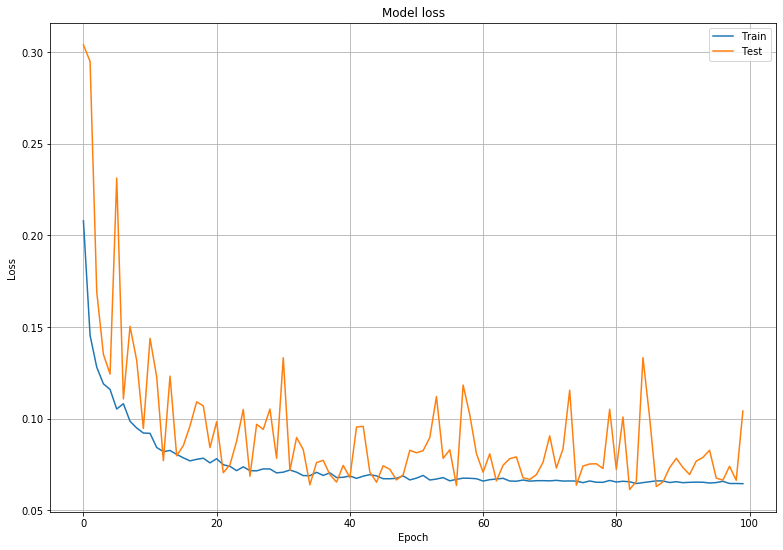

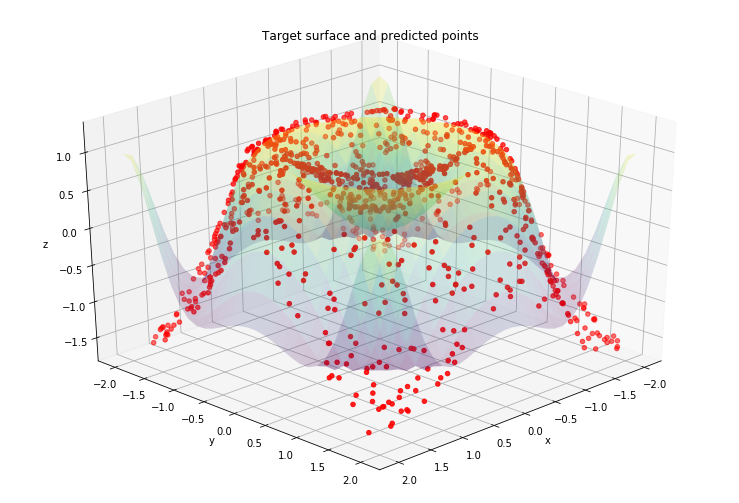

In [6]:
from mpl_toolkits import mplot3d

epoch=100
layer=10
neuron=15
activate="selu"
sigma=0.25

#generating training points
x_train=np.random.uniform(-1.5, 1.5, 5000)
y_train=np.random.uniform(-1.5, 1.5, 5000)
z_train=np.random.normal(np.sin(x_train**2+y_train**2), sigma)
#generating validation points
x_valid=np.random.uniform(-1.5, 1.5, 500)
y_valid=np.random.uniform(-1.5, 1.5, 500)
x_valid.sort()
y_valid.sort()
z_valid=np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

#composing the NN model
model=tf.keras.Sequential()
model.add(Dense(neuron, input_shape=(2,), activation=activate))
#adding layers
for k in range(layer-2):
        model.add(Dense(neuron, activation=activate))
model.add(Dense(1))
#compiling the NN model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#fitting the NN model using training data
history=model.fit(x=np.array([x_train, y_train]).T, y=z_train, batch_size=32, epochs=epoch, shuffle=True, validation_data=(np.array([x_valid, y_valid]).T, z_valid), verbose=False)

#preparing predicted points
x_predicted=np.random.uniform(-2, 2, 1000)
y_predicted=np.random.uniform(-2, 2, 1000)
z_predicted=model.predict(np.array([x_predicted, y_predicted]).T)
#and the target function
x=np.outer(np.linspace(-2,2,30), np.ones(30))
y=x.copy().T
z=np.sin(x**2+y**2)

#plotting results
#loss functions
plt.figure(figsize = (13, 9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)

#predicted points and the target function
plt.figure(figsize = (13, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Target surface and predicted points")
ax.view_init(30,45)
plt.show()

The fit is well done but once again the NN is not able to predict the shape of the function outside of the training range.